In [17]:
import nltk #Natural Language Tool Kit is basically a tool kit to work with human language data. 
#We will be importing stopwords as of now from NLTK.

In [18]:
#nltk.download_shell()
#This is download shell of NLTK. We used this to download the stopwords package.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=["label","message"])
#Making a dataframe and using the separator as tab. Also defining the names of the columns as label and messages. "Ham" and "Spam"
#will fall under the label column and the actual text will fall under the message.

In [21]:
messages.head()
#Having a look at the dataframe.

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
import string

In [23]:
string.punctuation
#We will use this later to remove the punctuations from the message.

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
messages.groupby('label').describe()
#Seeing the basic distribution ham and spam messages.

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [26]:
messages['length']=messages['message'].apply(len)
#Adding a new column 'length' to data base.

In [27]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A30A6429B0>,
      dtype=object)

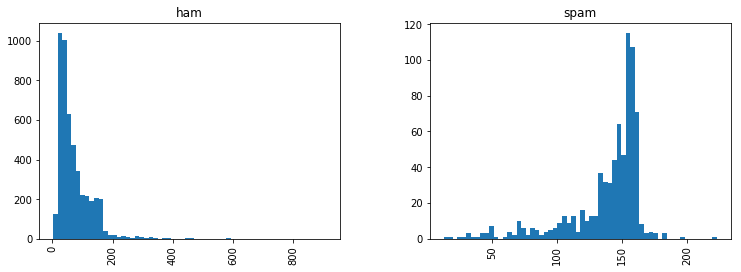

In [28]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))
#Visualizing to see if the we can use length to distinguish between spam and ham messages.

In [29]:
## Text Pre-processing
#What are we supposed to do with the data now:
#We will make a function that will remove all the punctuations and stop words as visualizing the length of the data set did'nt end
#up in any useful conclusion.

In [30]:
from nltk.corpus import stopwords
def text_process(text):
    clean = [char for char in text if char not in string.punctuation]
    clean=''.join(clean)
    return [char for char in clean.split() if char.lower() not in stopwords.words('english')]

In [31]:

from nltk.corpus import stopwords
def text_process(text):
    no_punc=[ char for char in text if text not in string.punctuation]
    no_punc=''.join(no_punc)
    nopunc=no_punc.split()
    return [word for word in nopunc if word.lower() not in stopwords.words('english')]

In [32]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
messages['message'].head().apply(text_process)
#Now we have tokenized the messages, removed punctuations and stop words.

0    [Go, jurong, point,, crazy.., Available, bugis...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3    [U, dun, say, early, hor..., U, c, already, sa...
4      [Nah, think, goes, usf,, lives, around, though]
Name: message, dtype: object

In [34]:
#Now the machine learning starts. :D

#We have to convert each message, represented as lemmas into a vector that ML models can understand.
#We'll do that in three steps using the bag-of-words model:

# Count how many times does a word occur in each message (Known as term frequency)

# Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

# Normalize the vectors to unit length, to abstract from the original text length

In [35]:
# First Step : CountVectorization

from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [37]:
print(len(bow_transformer.vocabulary_))

15333


In [38]:
message1=messages['message'][1085]

print(message1)

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [39]:
message1 = bow_transformer.transform([message1])

In [40]:
print(message1.shape)

(1, 15333)


In [41]:
# print(message1)

In [42]:
#Now we need to find the sparsity of the matrix.

In [43]:
print(bow_transformer.get_feature_names()[10487])

manageable


In [44]:
bow=bow_transformer.transform(messages['message'])

In [45]:
print("Sparse Matrix ", bow.shape)

Sparse Matrix  (5572, 15333)


In [46]:
print("Sparse Matrix ", bow.nnz)

Sparse Matrix  53364


In [47]:
print(" Sparsity of matrix: ", 100.00 *bow.nnz/(bow.shape[0]*bow.shape[1]))

 Sparsity of matrix:  0.06246117245253014


In [48]:
#Second Step: TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer= TfidfTransformer().fit(bow)
messages_tfidf=tfidf_transformer.transform(bow)

In [50]:
print(messages_tfidf.shape)

(5572, 15333)


In [51]:
from sklearn.cross_validation import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [54]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002A30A686C80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [55]:
predictions = pipeline.predict(msg_test)

In [56]:
from sklearn.metrics import accuracy_score

print(accuracy_score(predictions,label_test))

0.947085201793722
